## Association Rules Generation from Frequent Itemsets
Source: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

### __Celem badania__:

Dane do analizy sa transakcje pochodzące z pewnego sklepu spożywczego. Celem
badania jest szukanie

  1. produktów popularnych (często kupowanych).
  2. produktów rzadkich (rzadko kupowanych).
  3. produktów, które sa czesto kupowane razem.
  4. asocjacji między produktami.
  5. analiza czasu działania algorytmu *Apriori* i *FPGrowth*.

#### __Zadanie 1__: Zainstalować bibliotekę mlxtend (machine learning extension)
#### __Zadanie 2__: Wprowadzić dane z zadania 5 na ćwiczeniach 8 (Eksploaracja reguł asocjacyjnych).
* Przekształacić dane na binarne (_Transaction_Encoder_)
* Importować algorytm Apriori i association_rules z biblioteki _frequent_patterns_
* Ustawić parametry min_sup i generować wszystkie produkty częste i dwójki częste.
* Uporządkować produkty w kolejności malejącej względem wsparcia.
* Pokazać 5 najczęstrzych produktów na wykresie słupkowym (nazwa i wsparcie)

####__Zadanie 3__: Wyznaczyć zbiory częste dwu-, trzy-elementowe. Uporządkować malejąco względem wsparcia.
####__Zadanie 4__: Generować reguły dwu- i trzy-elementowe.  Wypisać 5 najlepszych reguł uwzględniając trzy miary: *lift, confidence i conviction*.

####__Zadaie 5__: Ładować dane _transactions_.
* Wyznaczyć liczbę transakcji, liczbę produktów.
* Wyznaczyć częstość występowania produktów. Uporządkować produkty w kolejności malejącej wzgledem wsparcia.
* Wizualizacja 10 nabardziej popularnych produktów (wykres słupkowy: nazwa i czestość).

#### __Zadanie 6__: Wstępne przetwarzanie.
* Usunąć spacje
* Konwertowanie na dane binarne.

#### __Zadanie 7__: Generowac produkty częste i rzadkie
* Ustawić parametr *min-sup* i  gerować 10 produktów najpopularniejszych i 10 produktów najrzadszych.
* Wizualizacja produktów częstych

#### __Zadanie 8__: Generować zbiory częste.
* 5 zbiorów częstych dwue-lementowych.
* 5 zbiorów częstych trzy-elementowych.   

#### __Zadanie 9__: Generować reguły asocjacyjnych
* Ustawić parametr _min_conf_ i generować 10 najlepszych reguł asocjacyjnych według miary _confidence_.
* Uwzględniając dodatkowo wskaźniki: _conviction i lift_, proponować 10 najlepszych reguł.

#### __Zadanie 10__: Porównać czas działania algorytmu Apriori i FPGrowth
* Ustawić próg _min_sup_={0.01,0.02,0.03,0.04,0.05}.
* Generować zbiory częste i mierzyć czas
* Wyświetlić czas vs. min_sup
* Jaka jest obserwacja?











## Zadanie 1:  Zainstalować bibliotekę mlxtend

In [2]:
# mlxtend is a library of useful tools for DM/ML tasks.
!pip install mlxtend



## Zadanie 2: Wprowadzić własny zbiór danych. Niżej jest przykład

In [3]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Wprowadzenie zbioru transakcji (lista list w Pandas)

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
# przekształacenie danych tekstowych na binarne
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print(te_ary)



[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


In [4]:
df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


(5, 11)

## Zadanie 3: Wyznaczyć produkty częstye. Niżej jest przykład

In [5]:

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Sortowanie
frequent_itemsets = frequent_itemsets.sort_values(['support'], ascending =[False])

# Wyświetlenie 10 najczestych
print(frequent_itemsets.head(30))



     support                              itemsets
5        1.0                        (Kidney Beans)
3        0.8                                (Eggs)
27       0.8                  (Eggs, Kidney Beans)
30       0.6                         (Eggs, Onion)
8        0.6                               (Onion)
76       0.6           (Eggs, Onion, Kidney Beans)
38       0.6                (Yogurt, Kidney Beans)
10       0.6                              (Yogurt)
36       0.6                 (Onion, Kidney Beans)
6        0.6                                (Milk)
34       0.6                  (Kidney Beans, Milk)
123      0.4   (Eggs, Onion, Yogurt, Kidney Beans)
127      0.4         (Eggs, Onion, Nutmeg, Yogurt)
35       0.4                (Kidney Beans, Nutmeg)
42       0.4                        (Yogurt, Milk)
43       0.4                       (Onion, Nutmeg)
88       0.4          (Yogurt, Milk, Kidney Beans)
45       0.4                       (Onion, Yogurt)
74       0.4            (Eggs, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# create a new column "itemset_len"
frequent_itemsets['itemset_len'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
5,1.0,(Kidney Beans),1
3,0.8,(Eggs),1
27,0.8,"(Eggs, Kidney Beans)",2
30,0.6,"(Eggs, Onion)",2
8,0.6,(Onion),1
...,...,...,...
56,0.2,"(Onion, Corn, Kidney Beans)",3
55,0.2,"(Kidney Beans, Corn, Milk)",3
54,0.2,"(Onion, Corn, Ice cream)",3
53,0.2,"(Kidney Beans, Corn, Ice cream)",3


In [ ]:
#filtrowanie frequent_itemsets
frequent_itemsets[ (frequent_itemsets['itemset_len'] == 1) & (frequent_itemsets['support'] >= 0.1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
5,1.0,(Kidney Beans),1
3,0.8,(Eggs),1
8,0.6,(Onion),1
10,0.6,(Yogurt),1
6,0.6,(Milk),1
1,0.4,(Corn),1
7,0.4,(Nutmeg),1
0,0.2,(Apple),1
9,0.2,(Unicorn),1
4,0.2,(Ice cream),1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='itemsets'>

<Figure size 5000x1000 with 0 Axes>

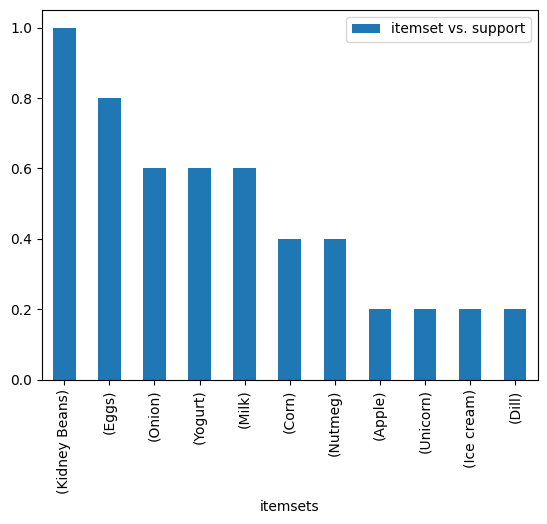

In [7]:

# wyświelenie produktów częstych (wykres słupkowy)
import matplotlib.pyplot as plt

df = frequent_itemsets[ (frequent_itemsets['itemset_len'] == 1) & (frequent_itemsets['support'] >= 0.1)]

plt.figure(figsize=(50,10))
df.plot( x = 'itemsets', y = 'support', kind ='bar', label = 'itemset vs. support')



In [8]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,1.0,0.00,inf,0.000000,0.800000,0.000000,0.900
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,1.0,0.00,1.0,0.000000,0.800000,0.000000,0.900
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.000000,0.750000,0.375000,0.875
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.500000,0.750000,1.000000,0.875
4,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.000000,0.600000,0.000000,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,"(Yogurt, Nutmeg)","(Eggs, Onion, Milk, Kidney Beans)",0.4,0.2,0.2,0.50,2.50,1.0,0.12,1.6,1.000000,0.500000,0.375000,0.750
1029,"(Yogurt, Milk)","(Eggs, Onion, Nutmeg, Kidney Beans)",0.4,0.4,0.2,0.50,1.25,1.0,0.04,1.2,0.333333,0.333333,0.166667,0.500
1030,"(Nutmeg, Milk)","(Eggs, Onion, Yogurt, Kidney Beans)",0.2,0.4,0.2,1.00,2.50,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750
1031,"(Kidney Beans, Nutmeg)","(Eggs, Onion, Yogurt, Milk)",0.4,0.2,0.2,0.50,2.50,1.0,0.12,1.6,1.000000,0.500000,0.375000,0.750


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2, num_itemsets=2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Eggs),(Onion),0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.600000,1.0,0.750000,0.375000,0.875000
1,(Onion),(Eggs),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.5,0.750000,1.000000,0.875000
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.600000,1.0,0.750000,0.375000,0.875000
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.5,0.750000,1.000000,0.875000
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.600000,1.0,0.750000,0.375000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,"(Kidney Beans, Nutmeg)","(Eggs, Onion, Yogurt, Milk)",0.4,0.2,0.2,0.500000,2.500000,1.0,0.12,1.600000,1.0,0.500000,0.375000,0.750000
1076,(Onion),"(Eggs, Kidney Beans, Nutmeg, Milk, Yogurt)",0.6,0.2,0.2,0.333333,1.666667,1.0,0.08,1.200000,1.0,0.333333,0.166667,0.666667
1077,(Eggs),"(Onion, Kidney Beans, Nutmeg, Milk, Yogurt)",0.8,0.2,0.2,0.250000,1.250000,1.0,0.04,1.066667,1.0,0.250000,0.062500,0.625000
1078,(Yogurt),"(Onion, Eggs, Nutmeg, Milk, Kidney Beans)",0.6,0.2,0.2,0.333333,1.666667,1.0,0.08,1.200000,1.0,0.333333,0.166667,0.666667


## Zadanie 4: Generować reguły asocjacyjne. Niżej jest przykład

In [10]:
# create a new column "attendent_len"
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len
0,(Eggs),(Onion),0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.600000,1.0,0.750000,0.375000,0.875000,1
1,(Onion),(Eggs),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.5,0.750000,1.000000,0.875000,1
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.600000,1.0,0.750000,0.375000,0.875000,2
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.5,0.750000,1.000000,0.875000,2
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.600000,1.0,0.750000,0.375000,0.875000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,"(Kidney Beans, Nutmeg)","(Eggs, Onion, Yogurt, Milk)",0.4,0.2,0.2,0.500000,2.500000,1.0,0.12,1.600000,1.0,0.500000,0.375000,0.750000,2
1076,(Onion),"(Eggs, Kidney Beans, Nutmeg, Milk, Yogurt)",0.6,0.2,0.2,0.333333,1.666667,1.0,0.08,1.200000,1.0,0.333333,0.166667,0.666667,1
1077,(Eggs),"(Onion, Kidney Beans, Nutmeg, Milk, Yogurt)",0.8,0.2,0.2,0.250000,1.250000,1.0,0.04,1.066667,1.0,0.250000,0.062500,0.625000,1
1078,(Yogurt),"(Onion, Eggs, Nutmeg, Milk, Kidney Beans)",0.6,0.2,0.2,0.333333,1.666667,1.0,0.08,1.200000,1.0,0.333333,0.166667,0.666667,1


In [11]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.250000,1.0,0.12,inf,0.500000,0.750000,1.0,0.875000,2
6,"(Eggs, Yogurt, Kidney Beans)",(Onion),0.4,0.6,0.4,1.0,1.666667,1.0,0.16,inf,0.666667,0.666667,1.0,0.833333,3
7,"(Onion, Yogurt, Kidney Beans)",(Eggs),0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000,3
8,"(Eggs, Yogurt)","(Onion, Kidney Beans)",0.4,0.6,0.4,1.0,1.666667,1.0,0.16,inf,0.666667,0.666667,1.0,0.833333,2
10,"(Onion, Yogurt)","(Eggs, Kidney Beans)",0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,"(Eggs, Nutmeg, Milk)","(Onion, Yogurt, Kidney Beans)",0.2,0.4,0.2,1.0,2.500000,1.0,0.12,inf,0.750000,0.500000,1.0,0.750000,3
1058,"(Yogurt, Nutmeg, Milk)","(Eggs, Onion, Kidney Beans)",0.2,0.6,0.2,1.0,1.666667,1.0,0.08,inf,0.500000,0.333333,1.0,0.666667,3
1061,"(Kidney Beans, Nutmeg, Milk)","(Eggs, Onion, Yogurt)",0.2,0.4,0.2,1.0,2.500000,1.0,0.12,inf,0.750000,0.500000,1.0,0.750000,3
1065,"(Onion, Milk)","(Eggs, Yogurt, Nutmeg, Kidney Beans)",0.2,0.4,0.2,1.0,2.500000,1.0,0.12,inf,0.750000,0.500000,1.0,0.750000,2


## Zadanie 5: Ładowanie danych z dysku:  zbiór Transakcje
1. Usuwanie spacji
2. Konwertowanie na postać binarną.


#Ładowanie danych z lokalnego dysku

In [ ]:
# Ładowanie danych: zbiór Transactions
import pandas as pd
dataset_raw = pd.read_csv('Transactions.csv', sep=',',header=None)
dataset = dataset_raw.apply(lambda x: list(x.dropna().values), axis=1).tolist()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame (te_ary, columns=te.columns_)
display(df)
df.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cream cheese,margarine,meat spreads,semi_finished bread,whole milk,yogurt,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped_sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(9835, 175)

## Zadanie 6: Wstępna analiza: Liczba transakcji, Liczba produktów

 Wyświetlić liczbę transakcji i liczbę produktów i 20 pierwszych transakcji.  

In [ ]:
# Wstępna analiza. Twój kod jest tutaj

In [ ]:
frequent_itemsets["itemset_len"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(['support'], ascending =[False])
frequent_itemsets

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
4,0.255414,(whole milk),1
6,0.193493,(other vegetables),1
8,0.183935,(rolls_buns),1
14,0.174377,(soda),1
1,0.139400,(yogurt),1
10,0.110524,(bottled water),1
19,0.108998,(root vegetables),1
2,0.104931,(tropical fruit),1
22,0.098526,(shopping bags),1
21,0.093950,(sausage),1


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='itemsets'>

<Figure size 20000x2000 with 0 Axes>

<Figure size 20000x2000 with 0 Axes>

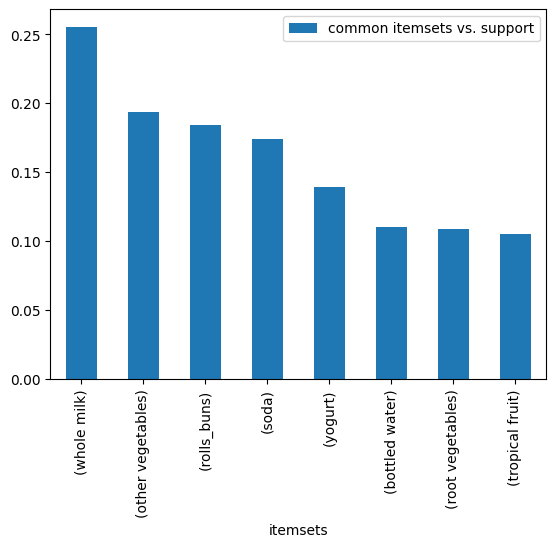

In [ ]:
# Trzeba zmienić parametr support
import matplotlib.pyplot as plt

df = frequent_itemsets[ (frequent_itemsets['itemset_len'] == 1) & (frequent_itemsets['support'] >= 0.9)]

#frequent_itemsets[(frequent_itemsets['itemset_len']==1) & (frequent_itemsets['support'] >= 0.1)]
#frequent_itemsets = frequent_itemsets.sort_values(['support'], ascending =[False])
plt.figure(figsize=(200,20))
plt.figure(figsize=(200,20))
df.plot(x = 'itemsets', y = 'support', kind = 'bar', label = 'common itemsets vs. support' )
#frequent_itemsets.plot(x = 'itemsets', y = 'support', kind = 'bar', label = 'common itemsets vs. support' )

In [ ]:
frequent_itemsets.sort_values(by="support", ascending = False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
28,0.255414,(whole milk),1
17,0.193493,(other vegetables),1
21,0.183935,(rolls_buns),1
25,0.174377,(soda),1
29,0.139400,(yogurt),1
2,0.110524,(bottled water),1
22,0.108998,(root vegetables),1
26,0.104931,(tropical fruit),1
24,0.098526,(shopping bags),1
23,0.093950,(sausage),1


In [ ]:
# Trzeba zmienić parametr min_threshold
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255414,0.074733,0.386232,1.512179,0.025312,1.213139
1,(rolls_buns),(whole milk),0.183935,0.255414,0.056634,0.307905,1.205511,0.009655,1.075843
2,(yogurt),(whole milk),0.139400,0.255414,0.056024,0.401896,1.573508,0.020420,1.244911
3,(root vegetables),(whole milk),0.108998,0.255414,0.048907,0.448694,1.756730,0.021067,1.350585
4,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693


In [ ]:
#!pip install fpgrowth_py
#!pip install mlxtend
%pip install mlxtend --upgrade
#from fpgrowth_py import fpgrowth

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth (df, min_support = 0.5, use_colnames=True)

frequent_itemsets.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139400,(yogurt)
2,0.104931,(tropical fruit)
3,0.058058,(coffee)
4,0.255414,(whole milk)
5,0.075648,(pip fruit)
6,0.193493,(other vegetables)
7,0.055414,(butter)
8,0.183935,(rolls_buns)
9,0.080529,(bottled beer)


## Zadanie 10: Porównać czas działania Apriori i FPGrowth

In [ ]:
# Trzeba zmienić
import time
l_ap=[0.01,0.02,0.03,0.04,0.05]
t_ap=[]
for i in l_ap:
    t1=time.time()
    apriori(df,min_support=i,use_colnames=True)
    t2=time.time()
    t_ap.append((t2-t1)*1000)

############# For FP-Growth ###########

# Tutaj podobny kod do obliczenia czasu działania dla algorytmu FPGrowth



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nimport matplotlib.pyplot as plt\nplt.plot(x = l_ap, y= t_fp, kind = \'scatter\',  label="fpgrowth")\nplt.plot(x= l_ap, y= t_ap,label="apriori")\nplt.xlabel("Min_support Threshold")\nplt.ylabel("Run Time in ms")\n'

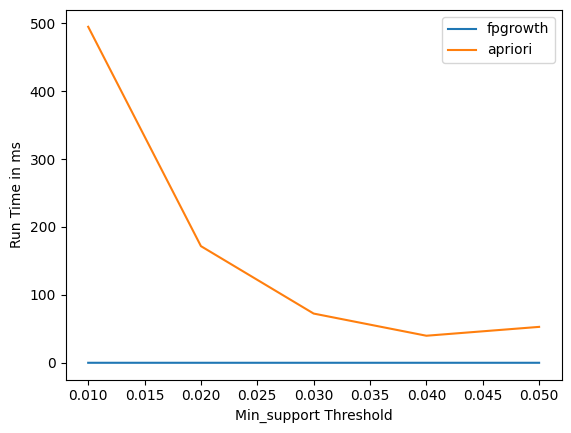

In [ ]:

import seaborn as sns

# Wyświetlić wykres czasu działania algorytmów Apriori i FPGrowth.
# Twój kod jest tutaj

